# Task2

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/movies.csv')

In [27]:
df.isnull().sum()

id                        0
rating                    0
title                     0
genres                   31
overview                  0
spoken_languages        138
cast                     89
crew                     24
vote_average              0
vote_count                0
popularity                0
budget                    0
keywords                747
production_companies    653
revenue                   0
runtime                   0
poster_path               0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
m = df['vote_count'].quantile(0.80)
C = df['vote_average'].mean()
df = df[df['vote_count'] >= m]

In [30]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

In [31]:
df['score'] = df.apply(weighted_rating,axis=1)
df.drop(labels=['rating'],axis=1,inplace=True)

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
new_df = df.drop_duplicates()
new_df = new_df.sort_values('score', ascending=False)

new_df[["title", "vote_count", "vote_average", "score",'popularity']].head(10) #dropping unnecessary columns

,title,vote_count,vote_average,score,popularity
166,The Godfather,6024.0,8.5,9044.032627,41.109264
200,The Shawshank Redemption,8358.0,8.5,9043.852582,51.645403
227,Once Upon a Time in America,1104.0,8.3,8925.505906,32.182851
351,Psycho,2405.0,8.3,8923.602813,36.826309
337,One Flew Over the Cuckoo's Nest,3001.0,8.3,8923.282089,35.529554
168,The Godfather: Part II,3418.0,8.3,8923.124195,36.629307
436,Life Is Beautiful,3643.0,8.3,8923.054015,39.394970
80,Spirited Away,3968.0,8.3,8922.966694,41.048867
8732,Whiplash,4376.0,8.3,8922.875434,64.299990
288,Schindler's List,4436.0,8.3,8922.863430,41.725123


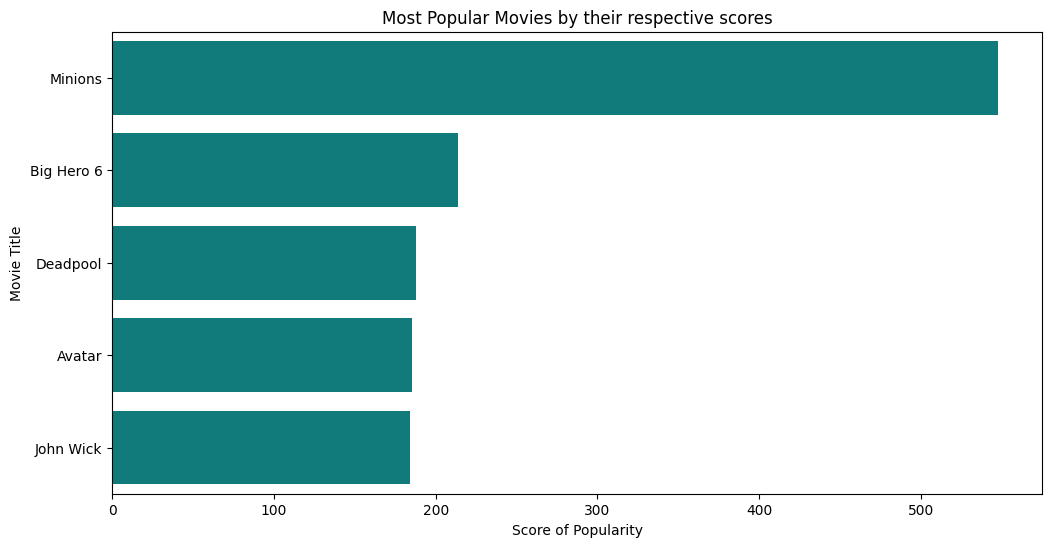

In [38]:
popularity = new_df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=popularity['popularity'].head(5), y=popularity['title'].head(5), data=popularity,color="darkcyan")

plt.title('Most Popular Movies by their respective scores')
plt.xlabel('Score of Popularity')
plt.ylabel('Movie Title')

plt.show()

Text(0, 0.5, 'Movie Title')

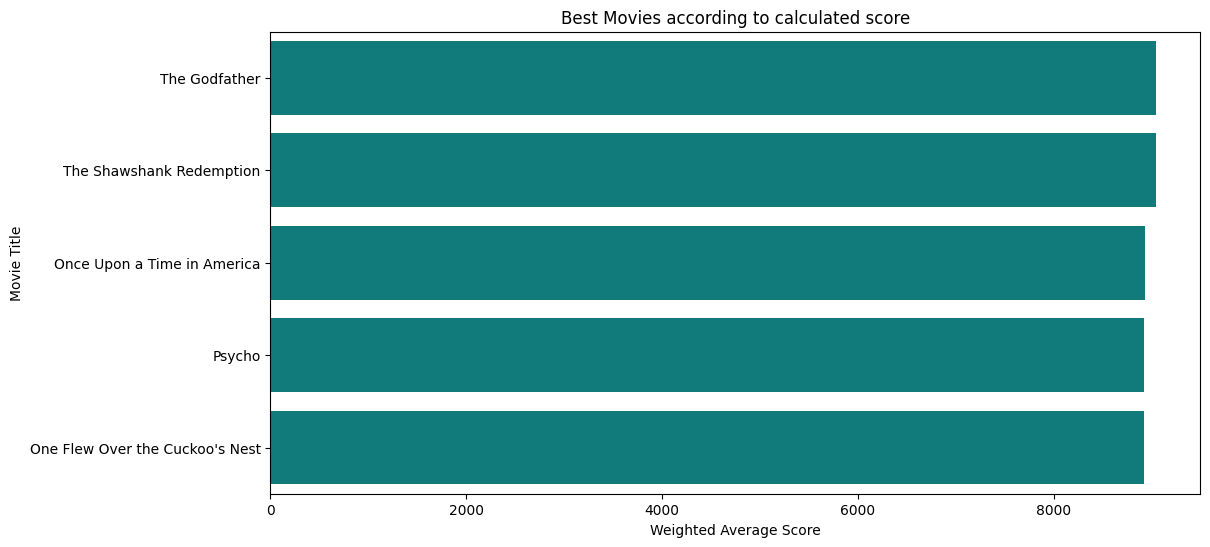

In [39]:
weight_average = new_df.sort_values('score',ascending=False)

plt.figure(figsize=(12,6))

axis1=sns.barplot(x=weight_average['score'].head(5), y=weight_average['title'].head(5), data=weight_average,color="darkcyan")

plt.title('Best Movies according to calculated score')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')

In [36]:
#SAVE 
import pickle
with open("models/popularityRecommender.pkl", "wb") as f:
    pickle.dump(popularity, f)

with open("models/weight_average.pkl", "wb") as f:
    pickle.dump(weight_average, f)